Epoch 1/100
167/167 [==============================] - 1s 3ms/step - loss: 0.0030 - val_loss: 0.0012
Epoch 2/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0011
Epoch 3/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0011
Epoch 4/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 6/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 7/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0011
Epoch 8/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 9/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0011 - val_loss: 0.0010
Epoch 10/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0010 - val_lo

167/167 [==============================] - 0s 2ms/step - loss: 9.0364e-04 - val_loss: 0.0010
Epoch 79/100
167/167 [==============================] - 0s 3ms/step - loss: 9.1518e-04 - val_loss: 9.9068e-04
Epoch 80/100
167/167 [==============================] - 0s 3ms/step - loss: 9.0358e-04 - val_loss: 0.0010
Epoch 81/100
167/167 [==============================] - 0s 3ms/step - loss: 9.0464e-04 - val_loss: 9.8802e-04
Epoch 82/100
167/167 [==============================] - 0s 3ms/step - loss: 8.8600e-04 - val_loss: 9.8547e-04
Epoch 83/100
167/167 [==============================] - 0s 3ms/step - loss: 9.1611e-04 - val_loss: 0.0010
Epoch 84/100
167/167 [==============================] - 0s 3ms/step - loss: 8.9745e-04 - val_loss: 0.0010
Epoch 85/100
167/167 [==============================] - 0s 3ms/step - loss: 9.0628e-04 - val_loss: 0.0010
Epoch 86/100
167/167 [==============================] - 0s 3ms/step - loss: 8.9563e-04 - val_loss: 9.9028e-04
Epoch 87/100
167/167 [=====================

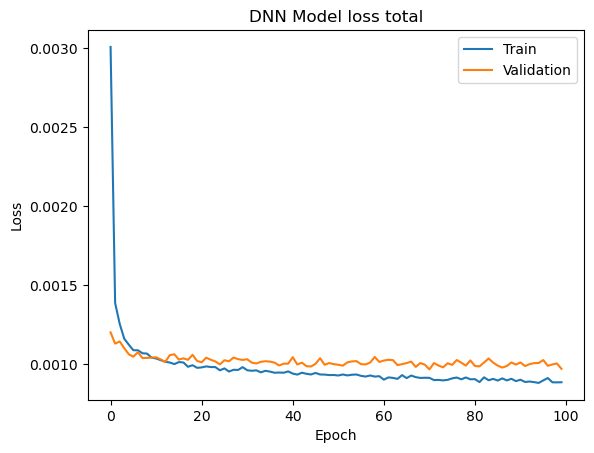

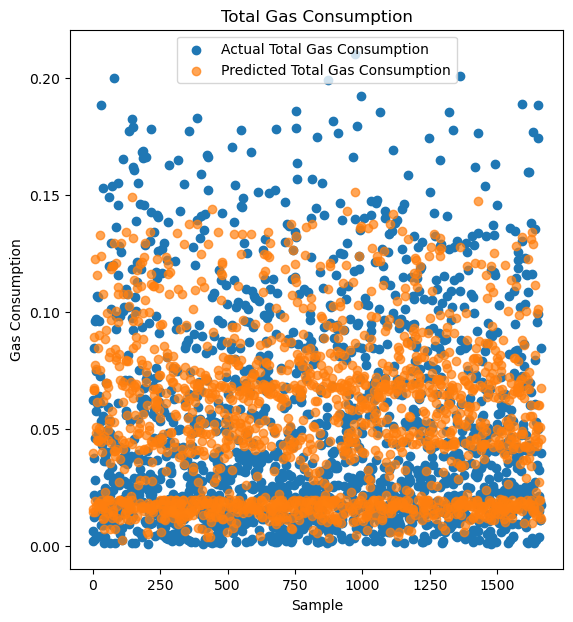

<Figure size 1400x700 with 0 Axes>

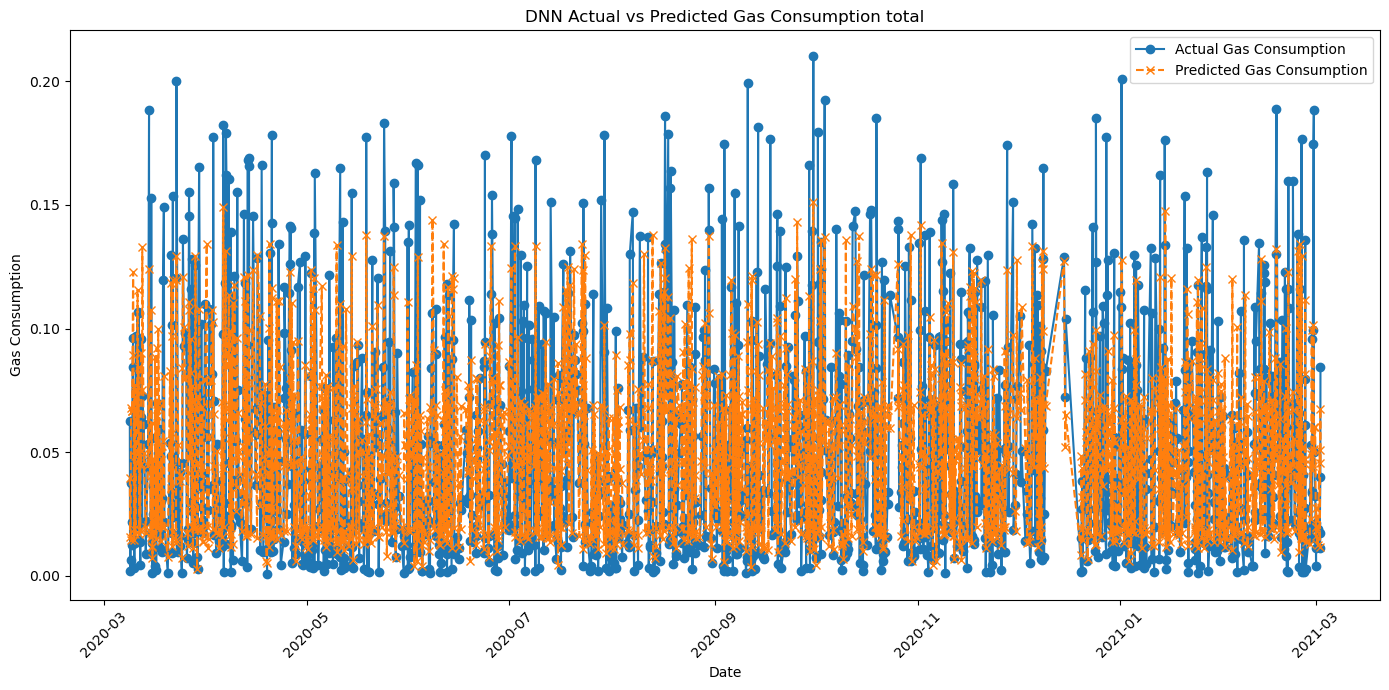

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('hourly_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean', 'DWH_temp_mean', 'DWH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)

# Build DNN model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
mape = mean_absolute_percentage_error(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
#external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
#sh_dwh_periods = external_temp_test < 15
#dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
#sh_dwh_contributions = predictions * sh_dwh_periods
#dwh_contributions = predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss total')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Compare actual vs predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), predictions, label='Predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

plt.show()

plt.figure(figsize=(14, 7))

#plt.subplot(1, 2, 2)
#plt.scatter(range(len(y_test)), sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', alpha=0.7)
#plt.scatter(range(len(y_test)), dwh_contributions, label='Predicted DWH Gas Consumption', alpha=0.7)
#plt.title('SH and DWH Gas Consumption')
#plt.xlabel('Sample')
#plt.ylabel('Gas Consumption')
#plt.legend()

plt.show()

# Plot actual vs predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, predictions, label='Predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('DNN Actual vs Predicted Gas Consumption total')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot actual vs predicted gas consumption over time with SH and DWH contributions
#plt.figure(figsize=(20, 7))
#plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
#plt.plot(date_test, predictions, label='Predicted Total Gas Consumption', marker='x', linestyle='--')
#plt.plot(date_test, sh_dwh_contributions, label='Predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
#plt.plot(date_test, dwh_contributions, label='Predicted DWH Gas Consumption', marker='d', linestyle='-.')

#plt.xlabel('Date')
#plt.ylabel('Gas Consumption')
#plt.title('Actual vs Predicted Gas Consumption')
#plt.legend()
#plt.xticks(rotation=45)
#plt.tight_layout()
#plt.show()


In [45]:
import math

# Calculate evaluation metrics
mae_DNN = mean_absolute_error(y_test, DWH_predictions)
mse_DNN = mean_squared_error(y_test, DWH_predictions)
rmse_DNN= math.sqrt(mse)
r2_DNN = r2_score(y_test, DWH_predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_DNN = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_DNN = mean_absolute_percentage_error(y_test, DWH_predictions)

print(f'Mean Squared Error (MSE): {mse_DNN}')
print(f'Root Mean Squared Error (RMSE): {rmse_DNN}')
print(f'R-squared (R²): {r2_DNN}')
print(f'Adjusted R-squared (R²): {adjusted_r2_DNN}')

print(f'Mean Absolute Error (MAE): {mae_DNN}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_DNN}%')

Mean Squared Error (MSE): 0.0015237440256355358
Root Mean Squared Error (RMSE): 0.03129099863693876
R-squared (R²): 0.249358153811426
Adjusted R-squared (R²): 0.5164892924176235
Mean Absolute Error (MAE): 0.029674197459581438
Mean Absolute Percentage Error (MAPE): 1.5091426166410122%


# model feature sh only

Epoch 1/100
167/167 [==============================] - 1s 3ms/step - loss: 0.0024 - val_loss: 0.0013
Epoch 2/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0013
Epoch 3/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 4/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 5/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0013
Epoch 6/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 7/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 9/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0013 - val_loss: 0.0012
Epoch 10/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0013 - val_lo

167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 82/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 83/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 84/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 85/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 86/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 87/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 88/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 89/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 0.0012
Epoch 90/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0012 - val_loss: 

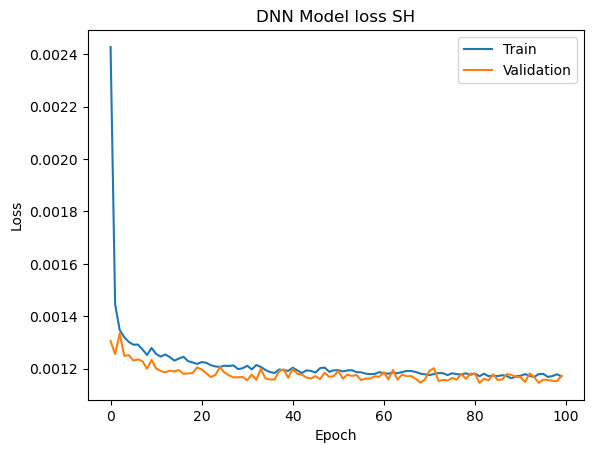

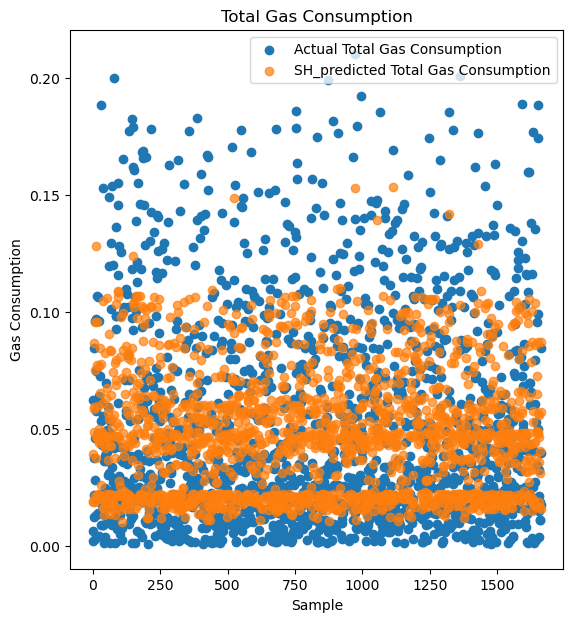

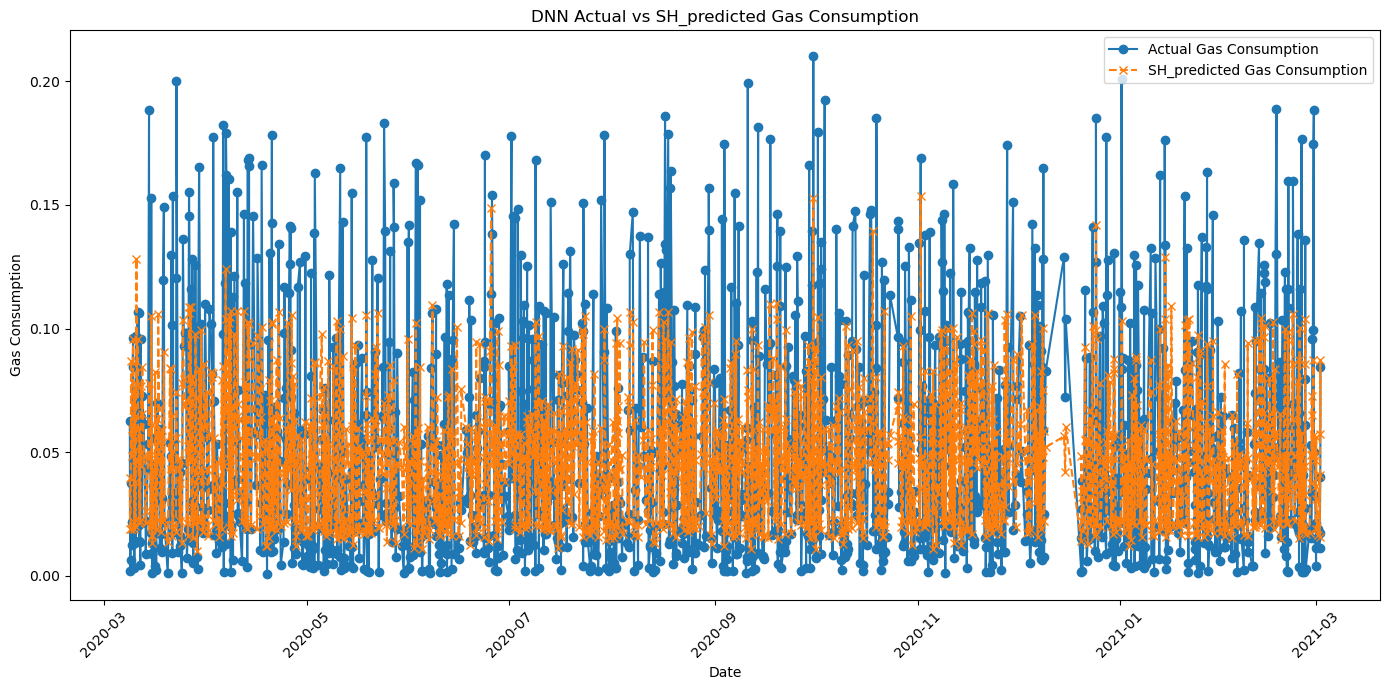

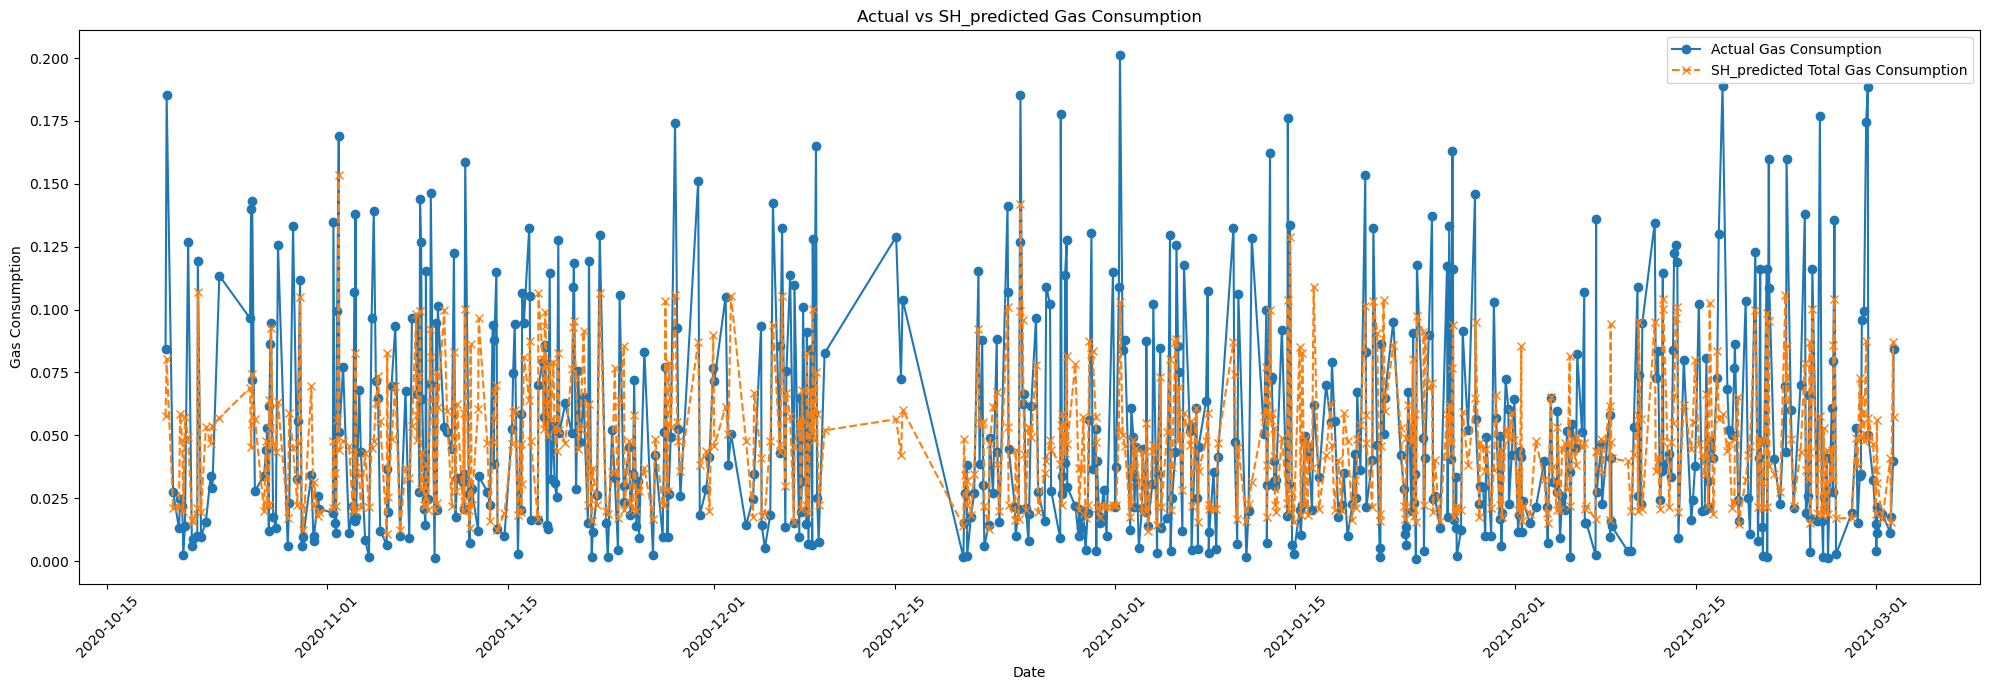

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('hourly_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['SH_temp_mean', 'SH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)

# Build DNN model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
SH_predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, SH_predictions)
mse = mean_squared_error(y_test, SH_predictions)
r2 = r2_score(y_test, SH_predictions)
mape = mean_absolute_percentage_error(y_test, SH_predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
#external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
#sh_dwh_periods = external_temp_test < 15
#dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
#sh_dwh_contributions = SH_predictions * sh_dwh_periods
#dwh_contributions = SH_predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss SH')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Compare actual vs SH_predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), SH_predictions, label='SH_predicted Total Gas Consumption', alpha=0.7)
plt.title('Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

plt.show()

#plt.figure(figsize=(14, 7))

#plt.subplot(1, 2, 2)
#plt.scatter(range(len(y_test)), sh_dwh_contributions, label='SH_predicted SH+DWH Gas Consumption', alpha=0.7)
#plt.scatter(range(len(y_test)), dwh_contributions, label='SH_predicted DWH Gas Consumption', alpha=0.7)
#plt.title('SH and DWH Gas Consumption')
#plt.xlabel('Sample')
#plt.ylabel('Gas Consumption')
#plt.legend()

plt.show()

# Plot actual vs SH_predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, SH_predictions, label='SH_predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('DNN Actual vs SH_predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


date_test=pd.DataFrame(date_test)
SH_predictions=pd.DataFrame(SH_predictions)
y_test=pd.DataFrame(y_test)



# Plot actual vs SH_predicted gas consumption over time with SH and DWH contributions
plt.figure(figsize=(20, 7))
plt.plot(date_test.tail(600), y_test.tail(600), label='Actual Gas Consumption', marker='o')
plt.plot(date_test.tail(600), SH_predictions.tail(600), label='SH_predicted Total Gas Consumption', marker='x', linestyle='--')
#plt.plot(date_test, sh_dwh_contributions, label='SH_predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
#plt.plot(date_test, dwh_contributions, label='SH_predicted DWH Gas Consumption', marker='d', linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs SH_predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [47]:
import math

# Calculate evaluation metrics
mae_DNN_SH = mean_absolute_error(y_test, DWH_predictions)
mse_DNN_SH = mean_squared_error(y_test, DWH_predictions)
rmse_DNN_SH= math.sqrt(mse)
r2_DNN_SH = r2_score(y_test, DWH_predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_DNN_SH = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_DNN_SH = mean_absolute_percentage_error(y_test, DWH_predictions)

print(f'Mean Squared Error (MSE): {mse_DNN_SH}')
print(f'Root Mean Squared Error (RMSE): {rmse_DNN_SH}')
print(f'R-squared (R²): {r2_DNN_SH}')
print(f'Adjusted R-squared (R²): {adjusted_r2_DNN_SH}')

print(f'Mean Absolute Error (MAE): {mae_DNN_SH}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_DNN_SH}%')

Mean Squared Error (MSE): 0.0015237440256355358
Root Mean Squared Error (RMSE): 0.03462196221766756
R-squared (R²): 0.249358153811426
Adjusted R-squared (R²): 0.40878282321284076
Mean Absolute Error (MAE): 0.029674197459581438
Mean Absolute Percentage Error (MAPE): 1.5091426166410122%


# model dwh only 

Epoch 1/100
167/167 [==============================] - 1s 3ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 2/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 3/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 4/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 5/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 6/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 7/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 8/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 9/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 10/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_lo

167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 82/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 83/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 84/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 85/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 86/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 87/100
167/167 [==============================] - 0s 3ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 88/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0014
Epoch 89/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 0.0015
Epoch 90/100
167/167 [==============================] - 0s 2ms/step - loss: 0.0014 - val_loss: 

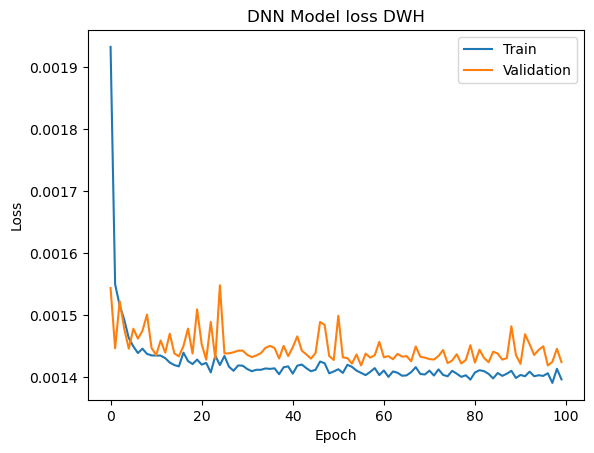

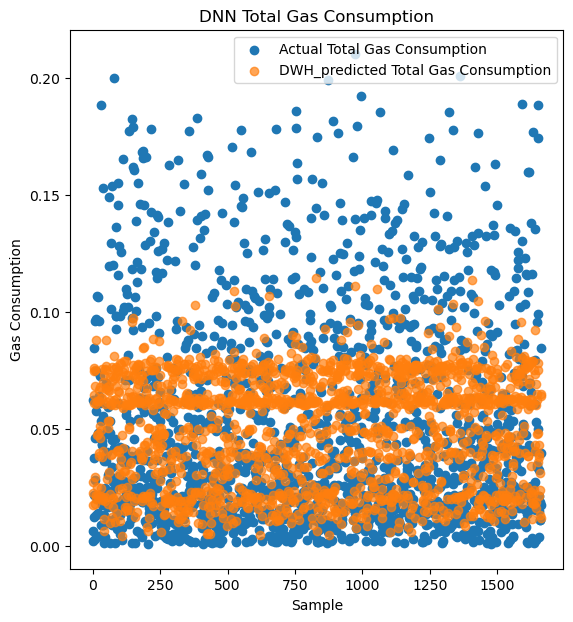

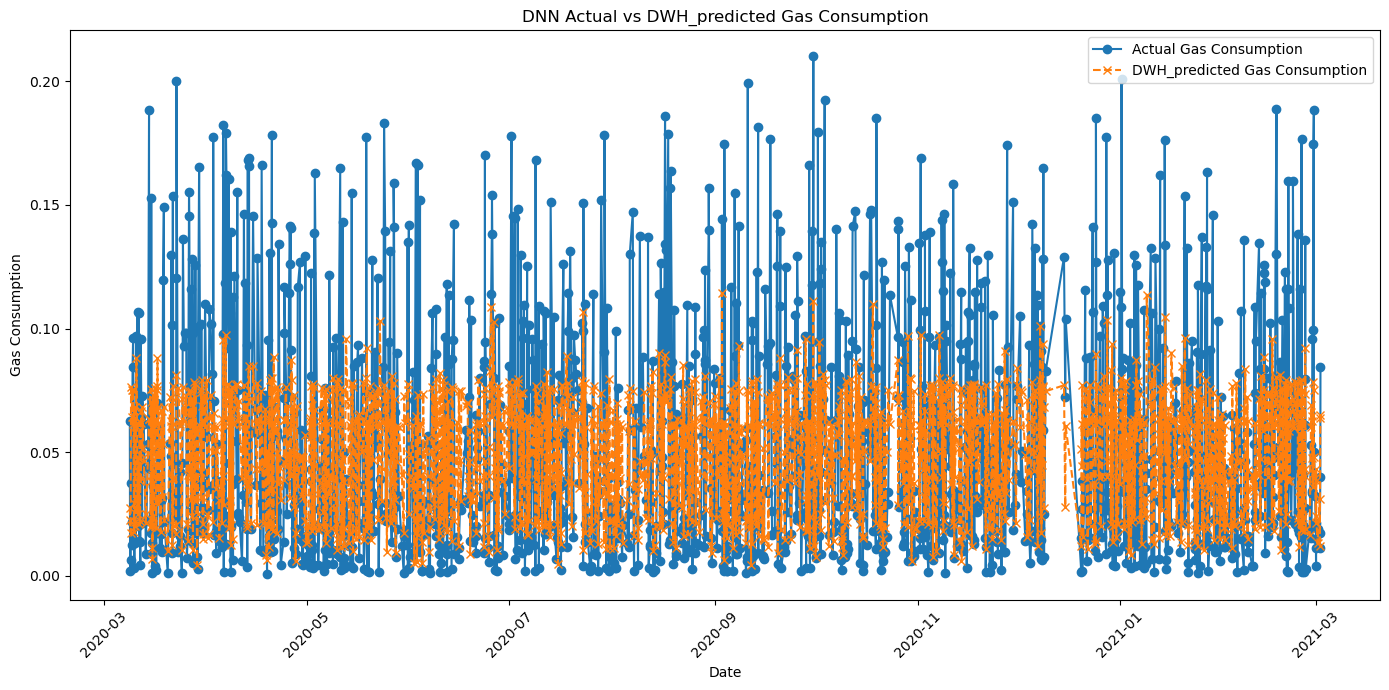

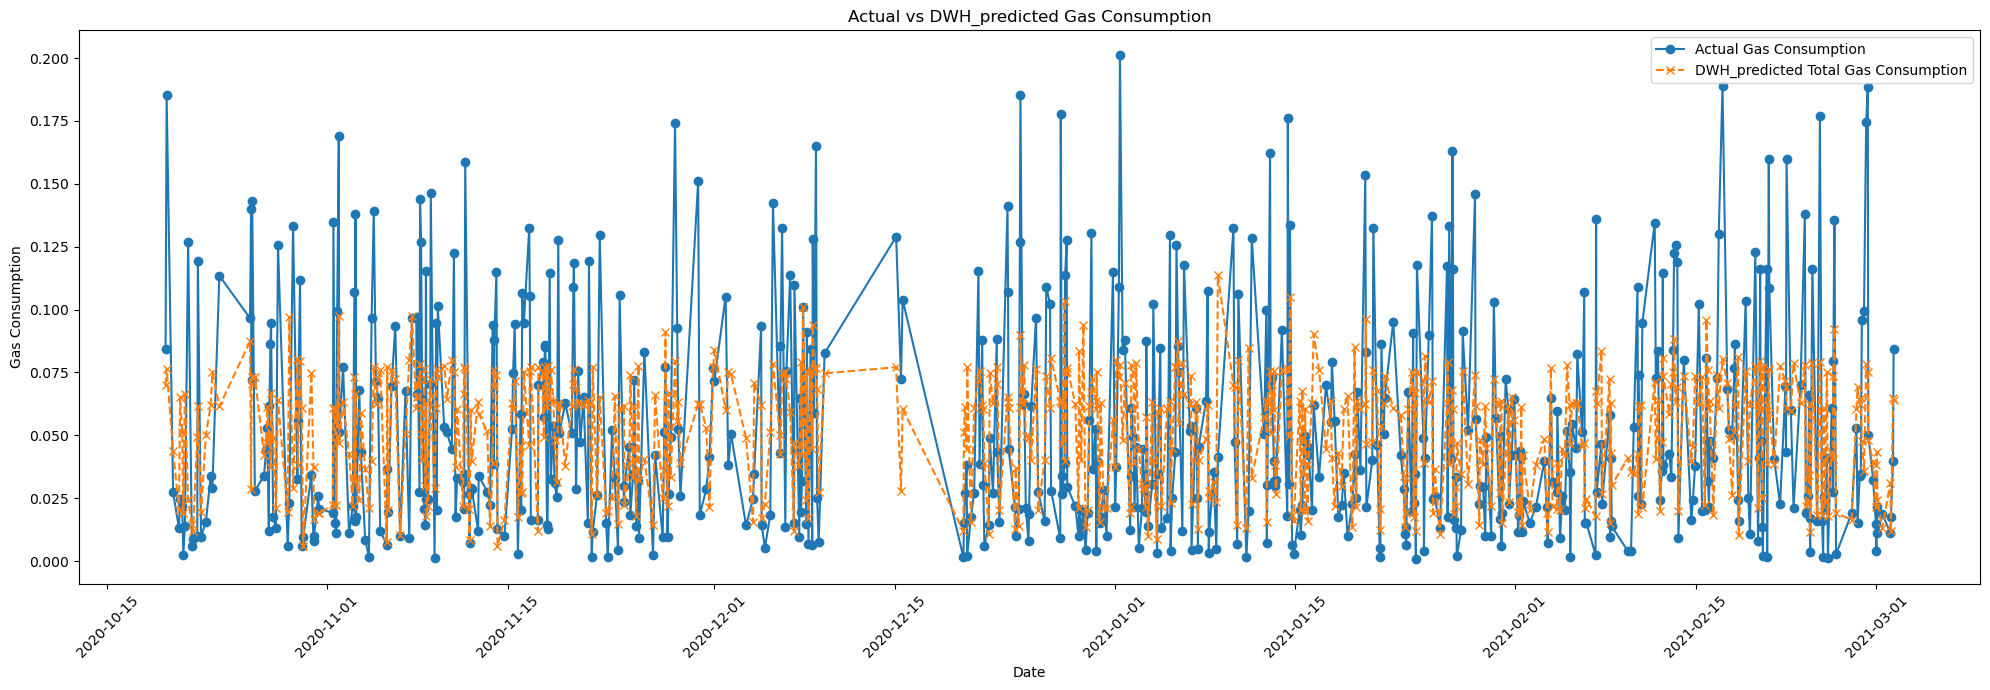

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Load the data
daily_stat = pd.read_csv('hourly_stat.csv').dropna()

# Ensure the date column is parsed as datetime
daily_stat['date'] = pd.to_datetime(daily_stat['date'])

# Extract features and target
features = daily_stat[['DWH_temp_mean', 'DWH_hum_mean']]
target = daily_stat['Gas_mean']

# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Split data while keeping the date for plotting
X_train, X_test, y_train, y_test, date_train, date_test = train_test_split(features_scaled, target, daily_stat['date'], test_size=0.2, random_state=42)

# Ensure dates are sorted
date_test = pd.Series(date_test).sort_values().reset_index(drop=True)
date_train = pd.Series(date_train).sort_values().reset_index(drop=True)

# Build DNN model
model = Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Predict gas consumption on the test set
DWH_predictions = model.predict(X_test).flatten()

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, DWH_predictions)
mse = mean_squared_error(y_test, DWH_predictions)
r2 = r2_score(y_test, DWH_predictions)
mape = mean_absolute_percentage_error(y_test, DWH_predictions)


print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R²): {r2}')
print(f'Mean Absolute Percentage Error (MAPE): {mape}%')

# Assuming SH periods are marked in your dataset, create boolean masks for SH and DWH periods
#external_temp_test = X_test[:, 4] * scaler.scale_[4] + scaler.mean_[4]  # Reverse normalization for external temp
#sh_dwh_periods = external_temp_test < 15
#dwh_periods = external_temp_test >= 15

# For simplicity, assume gas consumption for SH and DWH can be linearly decomposed
#sh_dwh_contributions = DWH_predictions * sh_dwh_periods
#dwh_contributions = DWH_predictions * dwh_periods

# Plot training loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('DNN Model loss DWH')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Compare actual vs DWH_predicted SH and DWH gas consumption
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
plt.scatter(range(len(y_test)), y_test, label='Actual Total Gas Consumption')
plt.scatter(range(len(y_test)), DWH_predictions, label='DWH_predicted Total Gas Consumption', alpha=0.7)
plt.title('DNN Total Gas Consumption')
plt.xlabel('Sample')
plt.ylabel('Gas Consumption')
plt.legend()

plt.show()

#plt.figure(figsize=(14, 7))

#plt.subplot(1, 2, 2)
#plt.scatter(range(len(y_test)), sh_dwh_contributions, label='DWH_predicted SH+DWH Gas Consumption', alpha=0.7)
#plt.scatter(range(len(y_test)), dwh_contributions, label='DWH_predicted DWH Gas Consumption', alpha=0.7)
#plt.title('SH and DWH Gas Consumption')
#plt.xlabel('Sample')
#plt.ylabel('Gas Consumption')
#plt.legend()

plt.show()

# Plot actual vs DWH_predicted gas consumption over time
plt.figure(figsize=(14, 7))
plt.plot(date_test, y_test, label='Actual Gas Consumption', marker='o')
plt.plot(date_test, DWH_predictions, label='DWH_predicted Gas Consumption', marker='x', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('DNN Actual vs DWH_predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





date_test=pd.DataFrame(date_test)
DWH_predictions=pd.DataFrame(DWH_predictions)
y_test=pd.DataFrame(y_test)




# Plot actual vs DWH_predicted gas consumption over time with SH and DWH contributions
plt.figure(figsize=(20, 7))
plt.plot(date_test.tail(600), y_test.tail(600), label='Actual Gas Consumption', marker='o')
plt.plot(date_test.tail(600), DWH_predictions.tail(600), label='DWH_predicted Total Gas Consumption', marker='x', linestyle='--')
#plt.plot(date_test, sh_dwh_contributions, label='DWH_predicted SH+DWH Gas Consumption', marker='s', linestyle=':')
#plt.plot(date_test, dwh_contributions, label='DWH_predicted DWH Gas Consumption', marker='d', linestyle='-.')

plt.xlabel('Date')
plt.ylabel('Gas Consumption')
plt.title('Actual vs DWH_predicted Gas Consumption')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
import math

# Calculate evaluation metrics
mae_DNN_DWH = mean_absolute_error(y_test, DWH_predictions)
mse_DNN_DWH = mean_squared_error(y_test, DWH_predictions)
rmse_DNN_DWH= math.sqrt(mse)
r2_DNN_DWH = r2_score(y_test, DWH_predictions)
n = len(y_test)
p = X_test.shape[1]
adjusted_r2_DNN_DWH = 1 - (1 - r2) * (n - 1) / (n - p - 1)
mape_DNN_DWH = mean_absolute_percentage_error(y_test, DWH_predictions)

print(f'Mean Squared Error (MSE): {mse_DNN_DWH}')
print(f'Root Mean Squared Error (RMSE): {rmse_DNN_DWH}')
print(f'R-squared (R²): {r2_DNN_DWH}')
print(f'Adjusted R-squared (R²): {adjusted_r2_DNN_DWH}')

print(f'Mean Absolute Error (MAE): {mae_DNN_DWH}')
print(f'Mean Absolute Percentage Error (MAPE): {mape_DNN_DWH}%')

Mean Squared Error (MSE): 0.0014890988517415086
Root Mean Squared Error (RMSE): 0.03858884361757305
R-squared (R²): 0.26642540188971786
Adjusted R-squared (R²): 0.2655415770727175
Mean Absolute Error (MAE): 0.02954337098903368
Mean Absolute Percentage Error (MAPE): 1.462832101072273%


In [ ]:
mae_DNN
mse_DNN
rmse_DNN
r2_DNN 
adjusted_r2_DNN
mape_DNN

mae_DNN_SH 
mse_DNN_SH 
rmse_DNN_SH
r2_DNN_SH 
adjusted_r2_DNN_SH 
mape_DNN_SH


mae_DNN_DWH 
mse_DNN_DWH 
rmse_DNN_DWH
r2_DNN_DWH 
adjusted_r2_DNN_DWH 
mape_DNN_DWH


In [53]:
import pandas as pd

# Define the metrics for each category
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAPE']

# Define the values for each metric
dnn_values = [mae_DNN, mse_DNN, rmse_DNN, r2_DNN, adjusted_r2_DNN, mape_DNN]
sh_values = [mae_DNN_SH, mse_DNN_SH, rmse_DNN_SH, r2_DNN_SH, adjusted_r2_DNN_SH, mape_DNN_SH]
dwh_values = [mae_DNN_DWH, mse_DNN_DWH, rmse_DNN_DWH, r2_DNN_DWH, adjusted_r2_DNN_DWH, mape_DNN_DWH]

# Create a dictionary to hold the data
data = {
    'Metric': metrics,
    'Total DNN': dnn_values,
    'SH DNN': sh_values,
    'DWH DNN': dwh_values
}

# Create a DataFrame
df_metrics = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df_metrics.to_csv('dnn_metrics.csv', index=False)

# Print the DataFrame to check
print(df_metrics)


        Metric  Total DNN    SH DNN   DWH DNN
0          MAE   0.029674  0.029674  0.029543
1          MSE   0.001524  0.001524  0.001489
2         RMSE   0.031291  0.034622  0.038589
3           R2   0.249358  0.249358  0.266425
4  Adjusted R2   0.516489  0.408783  0.265542
5         MAPE   1.509143  1.509143  1.462832


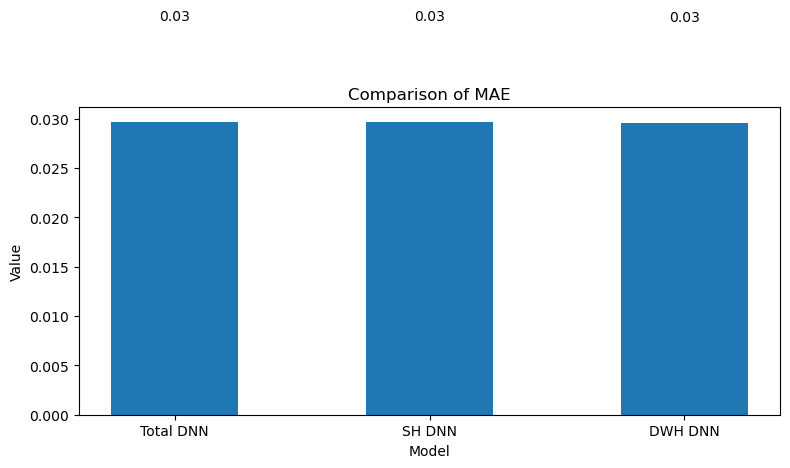

C:\Users\haochen shi\AppData\Local\Temp\ipykernel_23444\3775547191.py:36: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


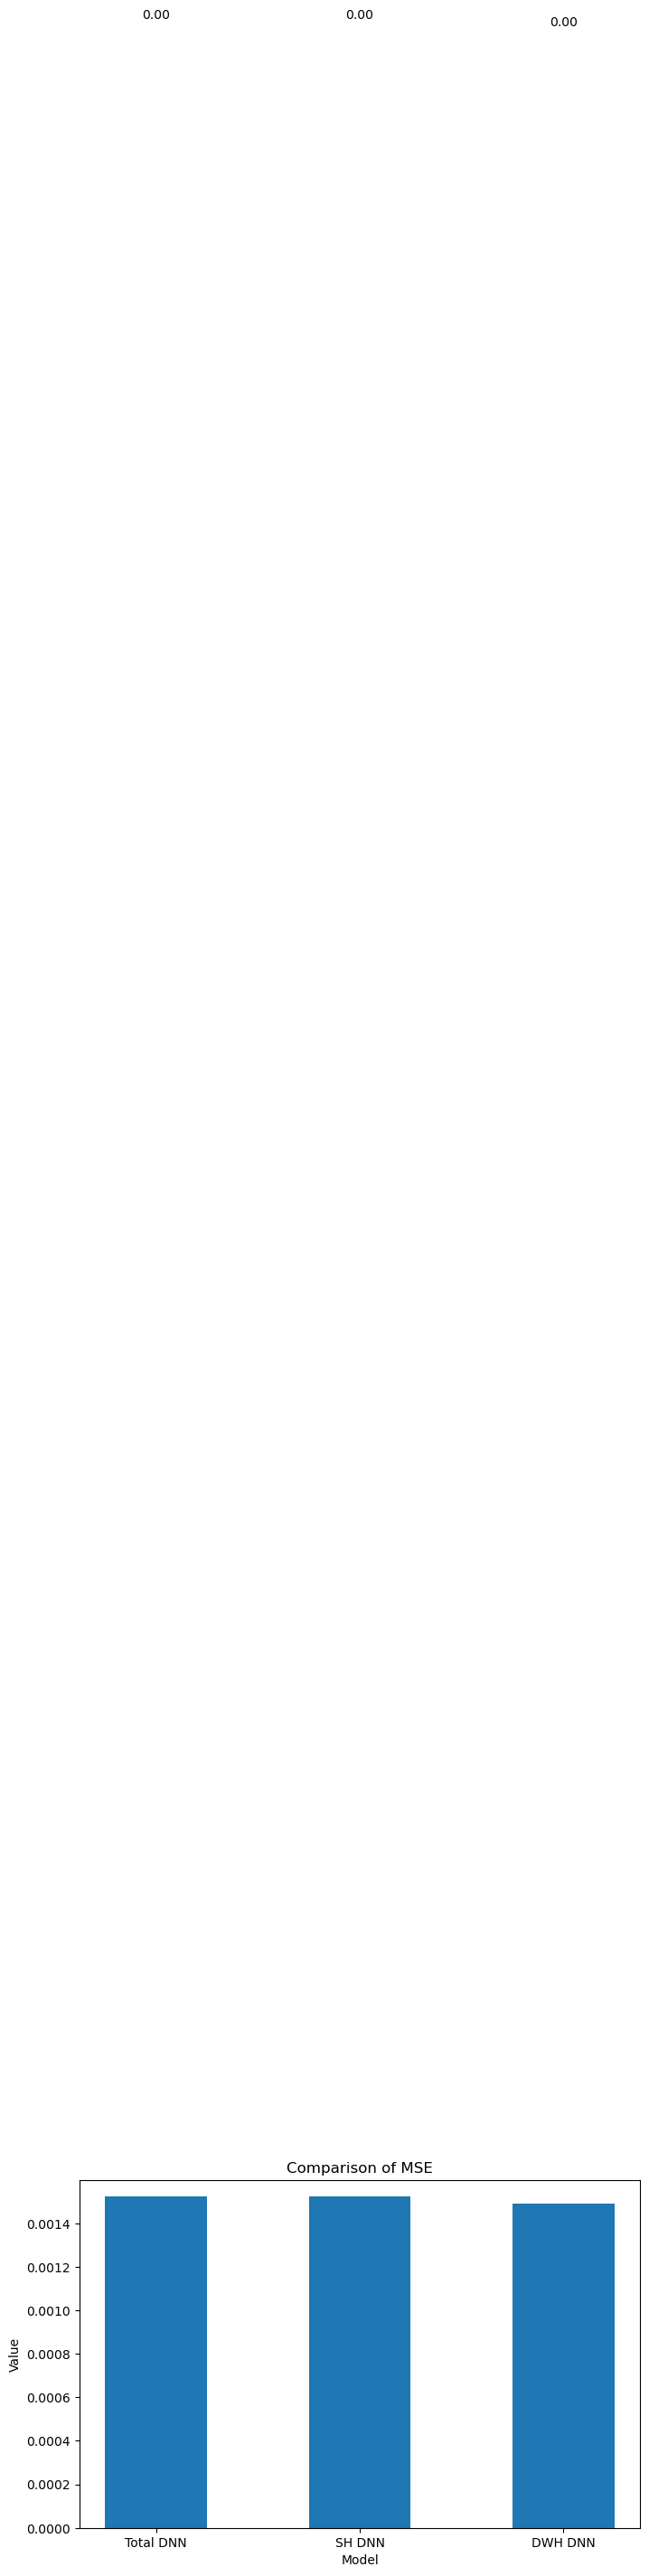

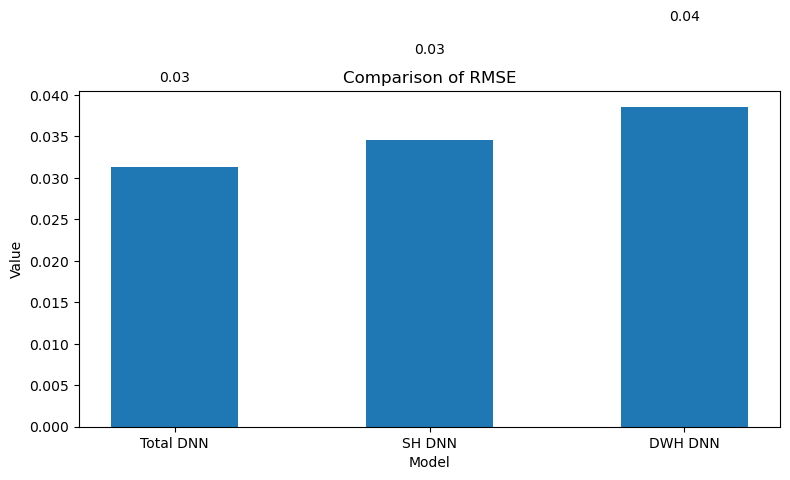

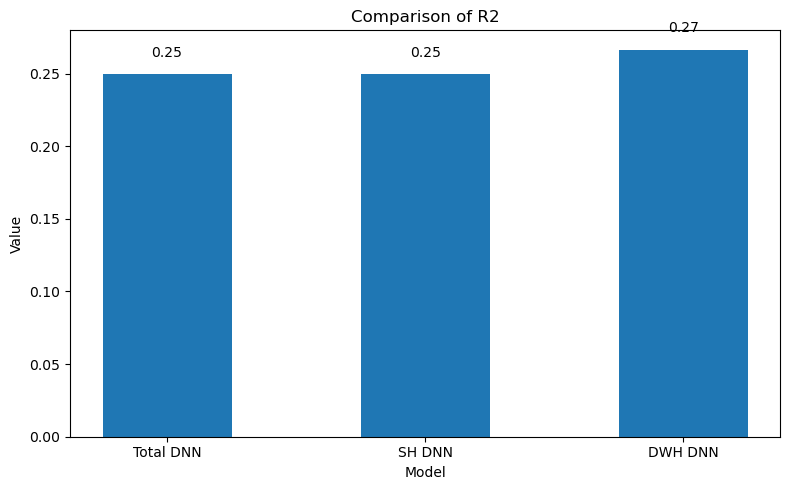

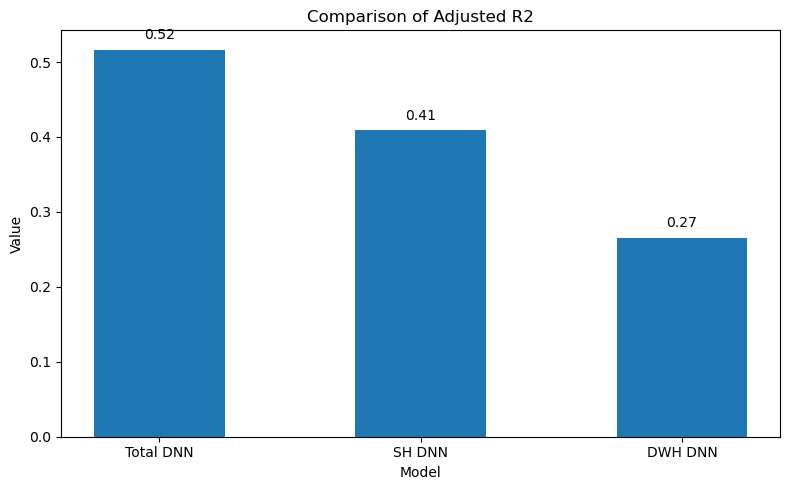

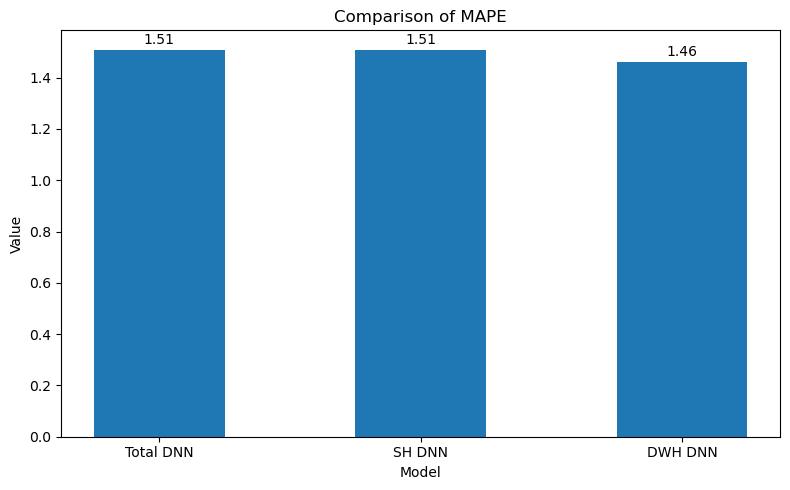

In [52]:
import matplotlib.pyplot as plt
import numpy as np

# Define the metrics for each category
metrics = ['MAE', 'MSE', 'RMSE', 'R2', 'Adjusted R2', 'MAPE']

# Define the values for each metric
dnn_values = [mae_DNN, mse_DNN, rmse_DNN, r2_DNN, adjusted_r2_DNN, mape_DNN]
sh_values = [mae_DNN_SH, mse_DNN_SH, rmse_DNN_SH, r2_DNN_SH, adjusted_r2_DNN_SH, mape_DNN_SH]
dwh_values = [mae_DNN_DWH, mse_DNN_DWH, rmse_DNN_DWH, r2_DNN_DWH, adjusted_r2_DNN_DWH, mape_DNN_DWH]

# Create a plot for each metric
for i, metric in enumerate(metrics):
    plt.figure(figsize=(8, 5))
    
    # Define the positions for the bars
    x = np.arange(3)
    width = 0.5  # Width of the bars

    # Values for the current metric
    values = [dnn_values[i], sh_values[i], dwh_values[i]]

    # Create the bar chart
    plt.bar(x, values, width, tick_label=['Total DNN', 'SH DNN', 'DWH DNN'])

    # Add some text for labels, title and custom x-axis tick labels, etc.
    plt.xlabel('Model')
    plt.ylabel('Value')
    plt.title(f'Comparison of {metric}')

    # Add values on top of the bars
    for j in range(len(values)):
        plt.text(x[j], values[j] + 0.01, f'{values[j]:.2f}', ha='center', va='bottom')

    # Display the plot
    plt.tight_layout()
    plt.show()
